In [3]:
 #Business Problem- Market Supply Analysis
#importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px


In [4]:
#importation of Data

#df=pd.read_csv('simple_vegetable_sales_data.csv')
df1=pd.read_csv('Vegetable_market.csv')
df1

df1.info()

#Removing 'Month' column
column_to_remove = 'Month'
if column_to_remove in df1:
    df1.drop(column_to_remove, axis=1, inplace=True)

# Save the modified DataFrame back to a CSV file
df1.to_csv('modified_file.csv', index=False)
#Confirming column was removed
print(df1.columns)

# Reading the first CSV file into a DataFrame
df = pd.read_csv('simple_vegetable_sales_data.csv')

# Reading the second CSV file
df1 = pd.read_csv('Vegetable_market.csv') 

# Concatenating dataframes along the rows
combined_df = pd.concat([df, df1], ignore_index=True)

# Saving the combined data to a new CSV file
combined_df.to_csv('combined_files.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Vegetable                        121 non-null    object
 1   Season                           121 non-null    object
 2   Month                            121 non-null    object
 3   Temp                             121 non-null    int64 
 4   Deasaster Happen in last 3month  121 non-null    object
 5   Vegetable condition              121 non-null    object
 6   Price per kg                     121 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 6.7+ KB
Index(['Vegetable', 'Season', 'Temp', 'Deasaster Happen in last 3month',
       'Vegetable condition', 'Price per kg'],
      dtype='object')


In [5]:
#DATA CLEANING
#combined_df.isna().sum()

# Check the shape (rows and columns) of the combined dataset
#print("Combined Dataset Shape:", combined_df.shape)

combined_df.info() 

#Checking for missing/null values
#combined_df.isnull().sum()
#df.dropna(inplace=True) #Removing rows with missing values

#Filling

# Assuming combined_df is your DataFrame
filled_data = combined_df['Price per kg'].fillna(np.mean(combined_df['Price per kg']), inplace=True)
filled_data = combined_df['Sales(kg)'].fillna(np.mean(combined_df['Sales(kg)']), inplace=True)

#Checking for missing/null values
combined_df.isnull().sum()

#checking for duplicates
#combined_df.duplicated().sum()
#Remove Duplicate
df_no_duplicates = combined_df.drop_duplicates()

# Drop rows with any null values
cleaned_df = combined_df.dropna()

# Drop columns with any null values
cleaned_df = combined_df.dropna(axis=1)

# Fill null values with a specific value
filled_df = combined_df.fillna(0)

# # Display a summary of the merged dataset
# print(combined_df.info())
# print(combined_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            481 non-null    object 
 1   Sales(kg)                        360 non-null    float64
 2   Supplier_Name                    360 non-null    object 
 3   Vegetable                        121 non-null    object 
 4   Season                           121 non-null    object 
 5   Temp                             121 non-null    float64
 6   Deasaster Happen in last 3month  121 non-null    object 
 7   Vegetable condition              121 non-null    object 
 8   Price per kg                     121 non-null    float64
dtypes: float64(3), object(6)
memory usage: 33.9+ KB


In [ ]:
#Seasonal demand analysis
# Group data by month and season, summing the sales for each combination
seasonal_sales = combined_df.groupby(['Month', 'Season', 'Vegetable'])['Sales(kg)'].sum().reset_index()

# Find the most sold vegetable per season
top_selling_per_season = seasonal_sales.loc[seasonal_sales.groupby('Season')['Sales(kg)'].idxmax()]

# Display the top-selling vegetable per season
print("Top selling vegetable per season:")
print(top_selling_per_season)

# Calculate total sales per month
monthly_sales = combined_df.groupby(['Month'])['Sales(kg)'].sum()

# Display total sales per month
print("\nTotal sales per month:")
print(monthly_sales)


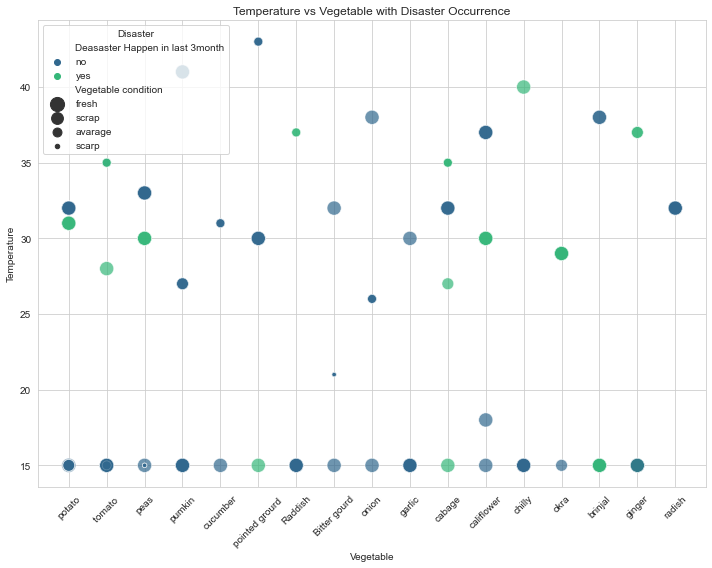

In [106]:
#VISUALIZATION
#Scatter plot visualizing how temperature varies concerning different vegetables with points colored based on disaster occurence and sized based on vegetable conditions
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Vegetable', y='Temp', hue='Deasaster Happen in last 3month', size='Vegetable condition',
                sizes=(20, 200), alpha=0.7, data=combined_df, palette='viridis')
plt.title('Temperature vs Vegetable with Disaster Occurrence')
plt.xlabel('Vegetable')
plt.ylabel('Temperature')
plt.legend(title='Disaster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Radish ,bitter guard,onions have not incured any disaster in the last 3months and they grow well in all conditions


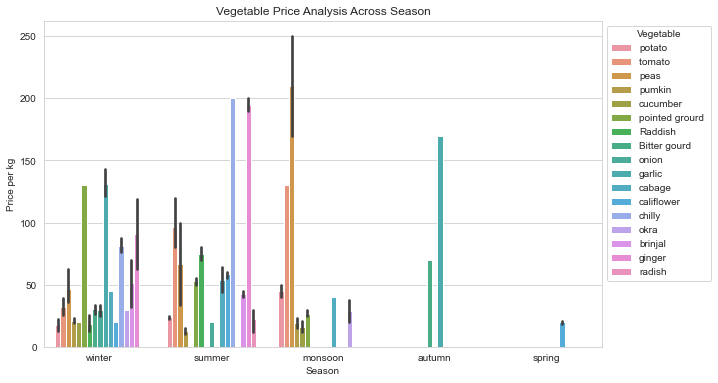

In [98]:
# Grouped Bar Chart visualizing vegetable Price Analysis across Seasons
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.barplot(x='Season', y='Price per kg', hue='Vegetable', data=combined_df)
plt.title('Vegetable Price Analysis Across Season')
plt.xlabel('Season')
plt.ylabel('Price per kg')
plt.legend(title='Vegetable', bbox_to_anchor=(1, 1), loc='upper left')  # Adjust legend position

plt.show()

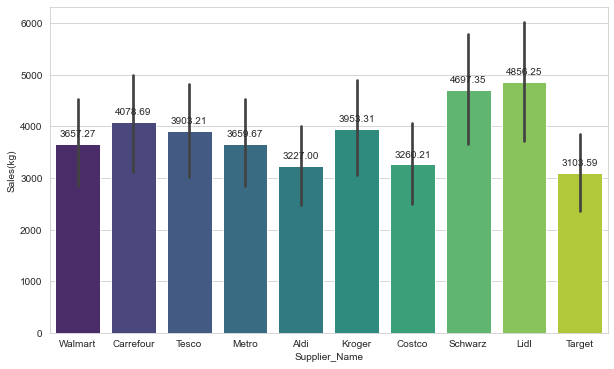

In [35]:
#Visualization
#Bar plot  visualizing comparing sales performance(kg) of different suppliers
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Supplier_Name', y='Sales(kg)', data=combined_df, estimator=np.mean, palette='viridis')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')
# Other plot customization...
plt.show()


In [47]:
#Visualizing mean sales per supplier across different months using Plotly express
#
supplier_means = df.pivot_table(values='Sales(kg)', index='Month', columns='Supplier_Name', aggfunc='mean')

# Resetting index to ensure 'Month' becomes a column (optional, depending on the DataFrame structure)
supplier_means = supplier_means.reset_index() #Used reset_index() method to reset the index of the pivot tables

# Melt the DataFrame to transform 'Supplier_Name' columns into a single column for the line plot
melted_supplier_means = supplier_means.melt(id_vars='Month', var_name='Supplier_Name', value_name='Mean_Sales') #used met() function to tranform the pivot table so that 'Supplier_name' becomes a single column
#ploting a line plot
fig = px.line(melted_supplier_means, x='Month', y='Mean_Sales', color='Supplier_Name',
              title='Mean Sales per Supplier across Months',
              labels={'Month': 'Month', 'Mean_Sales': 'Mean Sales', 'Supplier_Name': 'Supplier'})
fig.show()

#Sales increase from the 5th to 15 month and saes started decreasing from the 20th to 30th month

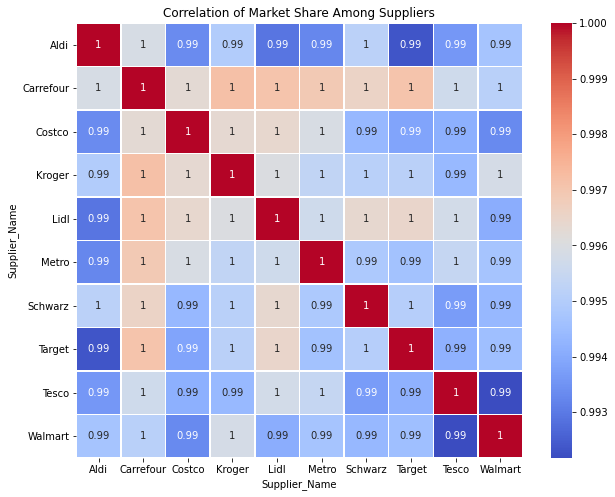

In [17]:
#Heatmap showing how the sales of different suppliers correlate with each other over time.
pivot_table = combined_df.pivot_table(index='Month', columns='Supplier_Name', values='Sales(kg)', aggfunc='sum')

# Calculate the correlation matrix among suppliers' market supply
correlation_matrix = pivot_table.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of Market Share Among Suppliers')
plt.show()

# Two suppliers with hight positive correlation means that when one supplier has high sakes, the other also tends to have high sales
# When two suppliers have high negative correlation e.g  Metro & Walmart, it means that when one supplier has high sales, the other tends to have low sales